In [35]:
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [36]:
df= pd.DataFrame(iris.data,columns=iris.feature_names)
df.drop(['sepal length (cm)','sepal width (cm)'],axis=1,inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


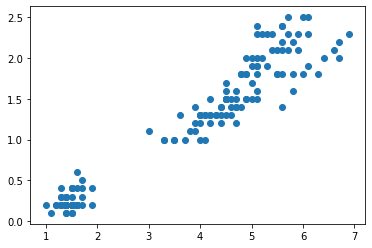

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [38]:
from sklearn.cluster import KMeans
k_rng= range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)


In [39]:
sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.477123363965468,
 13.916908757908757,
 11.040239971910452,
 9.309534981227774,
 7.615402244955953,
 6.456494541406307]

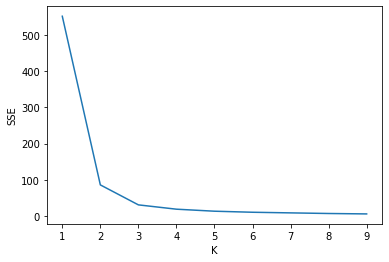

In [40]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

In [41]:
km=KMeans(n_clusters=2)
y_predicted= km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
df['cluster']=y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


Text(0, 0.5, 'petal width (cm)')

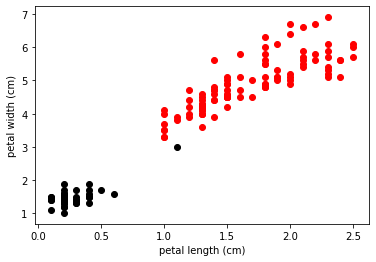

In [43]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]

plt.scatter(df0['petal width (cm)'],df0['petal length (cm)'],color="black")
plt.scatter(df1['petal width (cm)'],df1['petal length (cm)'],color="red")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [47]:
from sklearn.preprocessing import MinMaxScaler

x = df['petal length (cm)'].values.reshape(-1, 1) 
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df['petal length (cm)'] = x_scaled

df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.2,0
1,0.067797,0.2,0
2,0.050847,0.2,0
3,0.084746,0.2,0
4,0.067797,0.2,0


Text(0, 0.5, 'petal length (cm)')

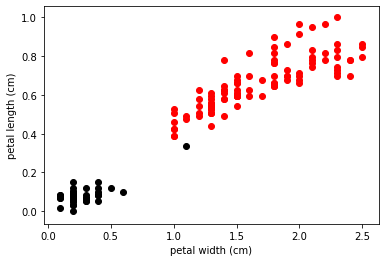

In [48]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]

plt.scatter(df0['petal width (cm)'],df0['petal length (cm)'],color="black")
plt.scatter(df1['petal width (cm)'],df1['petal length (cm)'],color="red")
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')